In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

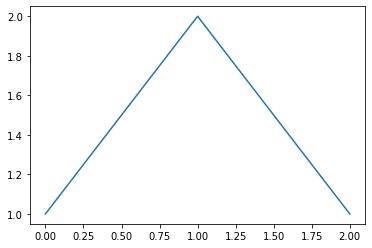

In [3]:
plt.plot(np.array([1, 2, 1]))

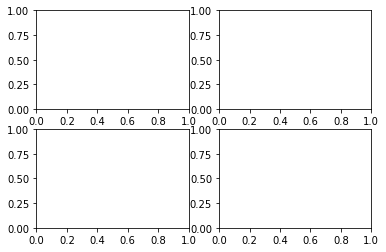

In [4]:
fig = plt.figure()
plot1 = fig.add_subplot(2, 2, 1)
plot2 = fig.add_subplot(2, 2, 2)
plot3 = fig.add_subplot(2, 2, 3)
plot4 = fig.add_subplot(2, 2, 4)

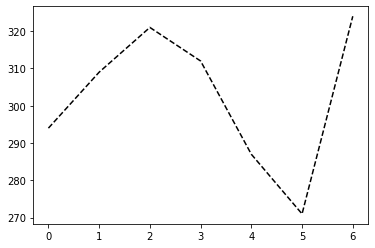

In [5]:
sec_per_mile = np.array([294, 309, 321, 312, 287, 271, 324])
plt.plot(sec_per_mile, 'k--')

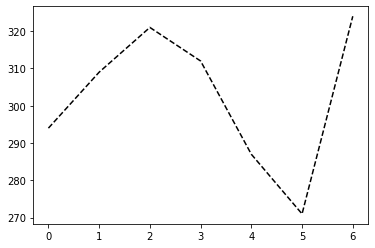

In [6]:
# Same plot as the one above, with the arguments passed more explicitly.
plt.plot(sec_per_mile, color='k', linestyle='dashed')

<BarContainer object of 6 artists>

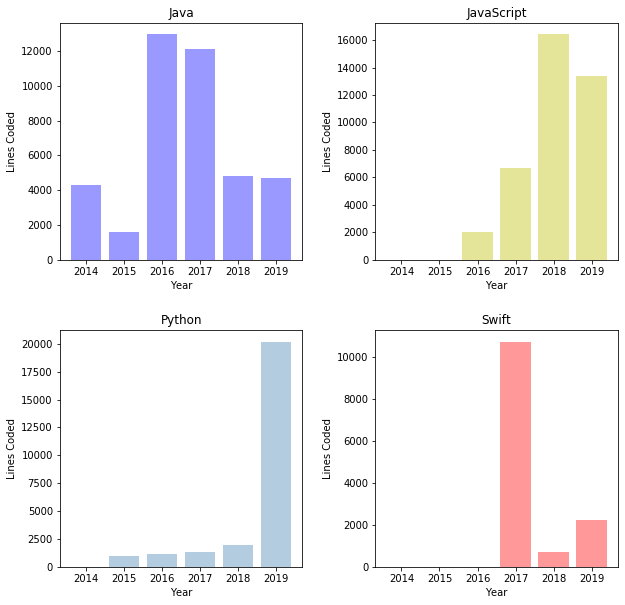

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

years = np.array([2014, 2015, 2016, 2017, 2018, 2019])
javaHistory = np.array([4282, 1585, 12962, 12103, 4819, 4715])

# Titles and labels can be set individually...
axes[0, 0].set_title('Java')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Lines Coded')
axes[0, 0].bar(years, javaHistory, color='b', alpha=0.4)

javaScriptHistory = np.array([0, 0, 2008, 6663, 16414, 13354])

# ... or with a dictionary... 
javaScriptProps = {
    'title': 'JavaScript',
    'xlabel': 'Year',
    'ylabel': 'Lines Coded'
}
axes[0, 1].set(**javaScriptProps)
axes[0, 1].bar(years, javaScriptHistory, color='y', alpha=0.4)

pythonHistory = np.array([0, 931, 1122, 1288, 1975, 20192])

# ... or using both.
props = {
    'xlabel': 'Year',
    'ylabel': 'Lines Coded'
}
axes[1, 0].set_title('Python')
axes[1, 0].set(**props)
axes[1, 0].bar(years, pythonHistory, color='#4180b1', alpha=0.4)

swiftHistory = np.array([0, 0, 0, 10726, 698, 2208])
axes[1, 1].set_title('Swift')
axes[1, 1].set(**props)
axes[1, 1].bar(years, swiftHistory, color='r', alpha=0.4)

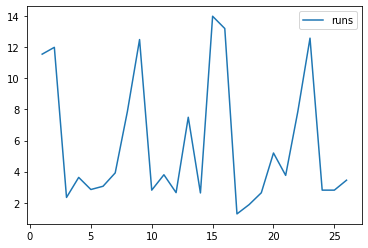

In [47]:
# Plotting data using a pandas DataFrame.  Behind the scenes, matplotlib is used.
# Spikes in the chart show that runs increase in length on the weekend.
feb_runs = [
    11.56, 12, 
    2.34, 3.63, 2.85, 3.06, 3.92, 7.87, 12.5, 
    2.81, 3.8, 2.65, 7.5, 2.63, 14, 13.21, 
    1.28, 1.88, 2.64, 5.20, 3.76, 7.87, 12.59, 
    2.81, 2.81, 3.45
]
df = pd.DataFrame({'runs': feb_runs}, index=np.arange(1, 27))
df.plot()

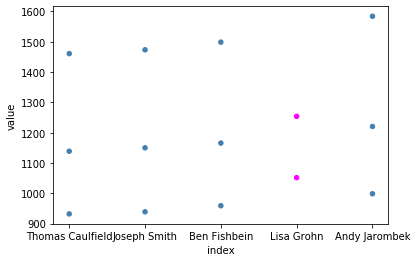

In [58]:
data_xctf = {
    '8K': [1460.80, 1473.50, 1498.80, np.nan, 1584.20],
    '6K': [1138.80, 1150.20, 1165.80, 1254.00, 1220.50],
    '5K': [932.00, 939.00, 959.00, 1051.60, 998.40]
}
run_sec_dataframe = pd.DataFrame(data_xctf, index=['Thomas Caulfield', 'Joseph Smith', 'Ben Fishbein', 'Lisa Grohn', 'Andy Jarombek'])
run_sec_dataframe = run_sec_dataframe.reset_index()
run_sec_dataframe = pd.melt(run_sec_dataframe, ['index'])

colors = {
    'Thomas Caulfield': '#4180b1', 
    'Joseph Smith': '#4180b1', 
    'Ben Fishbein': '#4180b1', 
    'Lisa Grohn': 'magenta', 
    'Andy Jarombek': '#4180b1'
}
run_sec_dataframe.plot.scatter(x='index', y='value', c=run_sec_dataframe['index'].apply(lambda x: colors[x]))